In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

from IPython.display import display_markdown

import cleaning

# Pruning and Resampling

In [11]:
rawData, users = cleaning.loadData("./Data/dataset_mood_smartphone.csv")
dailyData  = cleaning.resample_daily(rawData, users)
prunedDaily      = cleaning.pruneDays(dailyData,  users, method="longest", baseFrame=rawData)


# WARNING, HOURLY NOT COMPLETED
hourlyData = cleaning.resample_hourly(rawData, users)
prunedHourly= cleaning.pruneDays(hourlyData, users, method="longest", baseFrame=rawData)

<Axes: xlabel='time'>

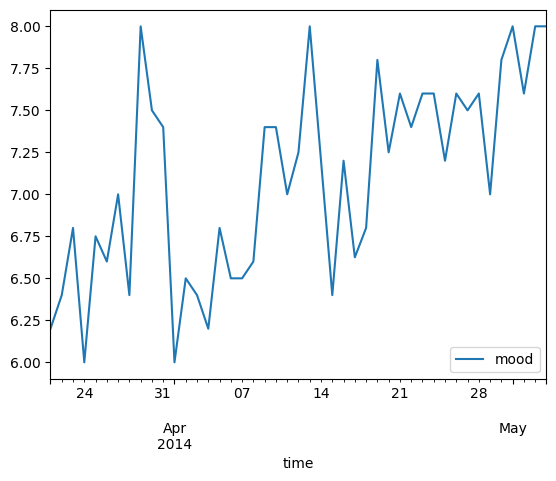

In [15]:
prunedDaily.loc[users[0]].plot.line(y = "mood")